In [83]:
from pyrocko import util, model, io, trace, moment_tensor, gmtpy,orthodrome
from pyrocko import orthodrome as od
from pyrocko.client import catalog
from pyrocko.automap import Map
import pyrocko.moment_tensor as pmt
from pyrocko.plot import mpl_color
from pyrocko.guts import load
# from seiscloud import plot as scp
# from seiscloud import cluster as scc
import numpy as np
import os
# import shutil
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime


import pygmt

In [84]:
workdir='../../clusty_flegrei/'
catdir_VT=os.path.join(workdir,'results_VT_2')
catdir_VLP=os.path.join(workdir,'results_VLP')

catname=os.path.join(catdir_VT,'cat_trimmed_mean_ccs_dbscan_comb_0.150_3.yaml')
clusty_events_VT=model.load_events(catname,format='yaml')

catname=os.path.join(catdir_VLP,'cat_trimmed_mean_ccs_dbscan_comb_0.150_3.yaml')
clusty_events_VLP=model.load_events(catname,format='yaml')

In [85]:
# VT
cluster_number=[]
cluster_color=[]
for ev in clusty_events_VT:
    if not ev.extras['cluster_number'] in cluster_number:
        cluster_number.append(ev.extras['cluster_number'])
        cluster_color.append(ev)

cls_VT = {key: [] for key in cluster_number}
for ev in clusty_events_VT:
    cls_VT[ev.extras['cluster_number']].append(ev)

cls_color_VT = {key: [] for key in cluster_number}
for color in cluster_color:
    cls_color_VT[color.extras['cluster_number']].append(color.extras['color'])

del cls_VT[-1]     #remove ev not clustered, only for VT
del cls_color_VT[-1]

for key in cls_VT:
    print(f'cluster {key} with n ev = {len(cls_VT[key])}')
    print(f'cluster {key} with color {cls_color_VT[key]}\n')

cluster 0 with n ev = 18
cluster 0 with color ['#00A08B']

cluster 2 with n ev = 12
cluster 2 with color ['#6A76FC']

cluster 1 with n ev = 19
cluster 1 with color ['#FD3216']

cluster 4 with n ev = 11
cluster 4 with color ['#620042']

cluster 3 with n ev = 4
cluster 3 with color ['#FF9616']

cluster 5 with n ev = 6
cluster 5 with color ['#328a3e']



In [86]:
# VLP
cluster_number=['VLP']
cluster_color=['#5D5D5D']

cls_VLP = {key: [] for key in cluster_number}
for ev in clusty_events_VLP:
    cls_VLP[cluster_number[0]].append(ev)

cls_color_VLP = {key: [] for key in cluster_number}
cls_color_VLP[cluster_number[0]].append(cluster_color[0])

for key in cls_VLP:
    print(f'cluster {key} with n ev = {len(cls_VLP[key])}')
    print(f'cluster {key} with color {cls_color_VLP[key]}\n')

cluster VLP with n ev = 14
cluster VLP with color ['#5D5D5D']



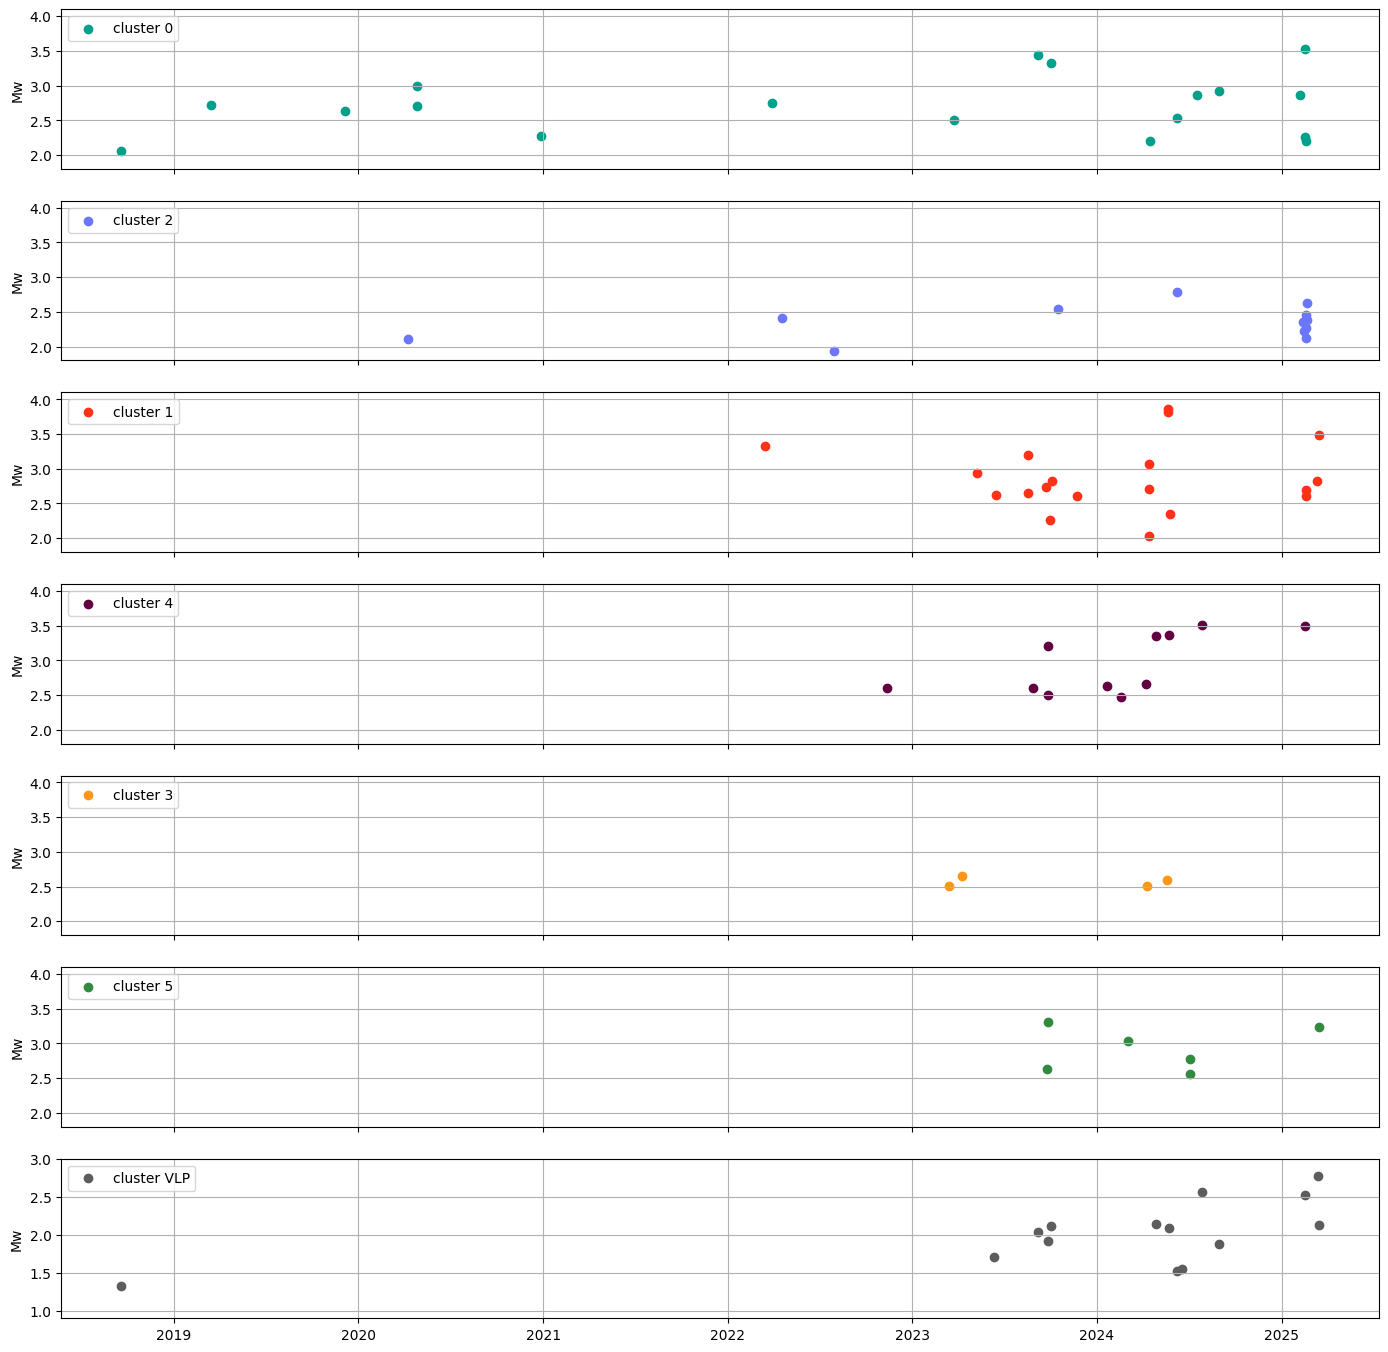

In [87]:
fig, axs = plt.subplots(7, 1, figsize=(17,17), sharex=True)

ylim_min=1.8
ylim_max=4.1
#VT plots
i=0
for key in cls_VT:
    magnitude = [ev.magnitude for ev in cls_VT[key]]
    time = [ev.time for ev in cls_VT[key]]
    eq_dates = [datetime.datetime.fromtimestamp(t) for t in time]

    axs[i].scatter(np.array(eq_dates),magnitude,color=cls_color_VT[key],label=f'cluster {key}')    
    axs[i].set_ylabel('Mw')
    axs[i].set_ylim(ylim_min,ylim_max)
    axs[i].legend(loc=2)
    axs[i].grid(True)

    i+=1

# VLP plot
key='VLP'

magnitude = [ev.magnitude for ev in cls_VLP[key]]
time = [ev.time for ev in cls_VLP[key]]
eq_dates = [datetime.datetime.fromtimestamp(t) for t in time]


axs[i].scatter(np.array(eq_dates),magnitude,color=cls_color_VLP[key],label=f'cluster {key}')    

axs[i].set_ylabel('Mw')
axs[i].set_ylim(0.9,3)
axs[i].legend(loc=2)
axs[i].grid(True)

axs[i].xaxis.set_major_locator(dates.YearLocator(1))  # Un'etichetta ogni anno
axs[i].xaxis.set_major_formatter(dates.DateFormatter('%Y'))
for label in axs[i].xaxis.get_majorticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')

fig.savefig('../PLOTS/TIMELINE_CLUSTERS/timeline.pdf')


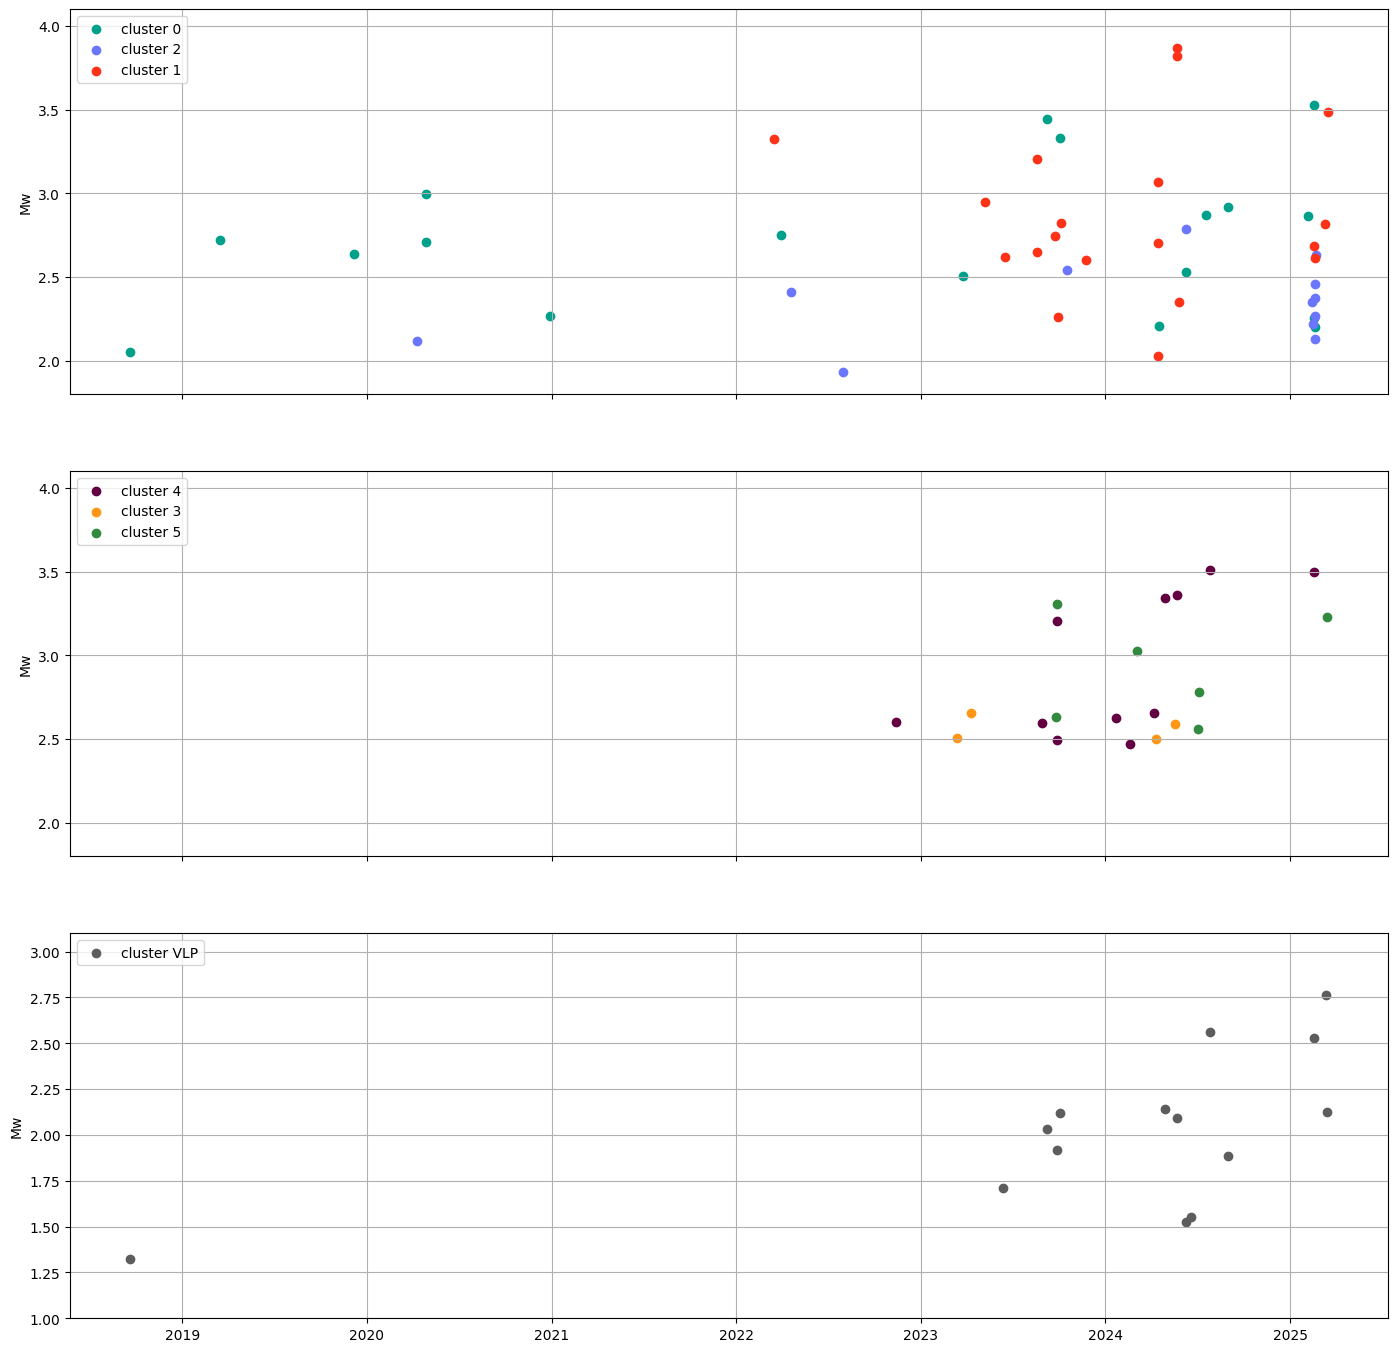

In [88]:
fig, axs = plt.subplots(3, 1, figsize=(17,17), sharex=True)

ylim_min=1.8
ylim_max=4.1
#VT plots
for key in cls_VT:
    if key == 0 or key == 1 or key == 2 :
        i=0
    elif key == 3 or key == 4 or key == 5 :
        i=1
    magnitude = [ev.magnitude for ev in cls_VT[key]]
    time = [ev.time for ev in cls_VT[key]]
    eq_dates = [datetime.datetime.fromtimestamp(t) for t in time]

    axs[i].scatter(np.array(eq_dates),magnitude,color=cls_color_VT[key],label=f'cluster {key}')    
    axs[i].set_ylabel('Mw')
    axs[i].set_ylim(ylim_min,ylim_max)
    axs[i].legend(loc=2)
    axs[i].grid(True)

    i+=1

# VLP plot
key='VLP'
i=2
magnitude = [ev.magnitude for ev in cls_VLP[key]]
time = [ev.time for ev in cls_VLP[key]]
eq_dates = [datetime.datetime.fromtimestamp(t) for t in time]


axs[i].scatter(np.array(eq_dates),magnitude,color=cls_color_VLP[key],label=f'cluster {key}')    

axs[i].set_ylabel('Mw')
axs[i].set_ylim(1,3.1)
axs[i].legend(loc=2)
axs[i].grid(True)

axs[i].xaxis.set_major_locator(dates.YearLocator(1))  # Un'etichetta ogni anno
axs[i].xaxis.set_major_formatter(dates.DateFormatter('%Y'))
for label in axs[i].xaxis.get_majorticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')

fig.savefig('../PLOTS/TIMELINE_CLUSTERS/timeline_3.pdf')

In [89]:
# VT (include ev not clustered)
cluster_number=[]
cluster_color=[]
for ev in clusty_events_VT:
    if not ev.extras['cluster_number'] in cluster_number:
        cluster_number.append(ev.extras['cluster_number'])
        cluster_color.append(ev)

cls_VT = {key: [] for key in cluster_number}
for ev in clusty_events_VT:
    cls_VT[ev.extras['cluster_number']].append(ev)

cls_color_VT = {key: [] for key in cluster_number}
for color in cluster_color:
    cls_color_VT[color.extras['cluster_number']].append(color.extras['color'])

# Select VT events corresponding to VLP events
VT=[]
for evVLP in cls_VLP['VLP']:
    for key in cls_VT:
        for evVT in cls_VT[key]:
            if evVLP.name == evVT.name:
                if evVT.extras['color'] == '#000000':
                    evVT.extras['color']= '#5D5D5D'
                VT.append([evVT.name,evVT.magnitude,evVT.extras['color'],evVT.extras['cluster_number']])

VT

[['flegrei_2018_09_18_21_36_41', 2.05404, '#00A08B', 0],
 ['flegrei_2023_06_11_06_44_25', 2.926, '#5D5D5D', -1],
 ['flegrei_2023_09_07_17_45_28', 3.44487, '#00A08B', 0],
 ['flegrei_2023_09_26_07_10_29', 3.20415, '#620042', 4],
 ['flegrei_2023_10_02_20_08_26', 3.33073, '#00A08B', 0],
 ['flegrei_2024_04_27_03_44_56', 3.34479, '#620042', 4],
 ['flegrei_2024_05_22_06_28_00', 3.36122, '#620042', 4],
 ['flegrei_2024_06_08_01_52_04', 2.53174, '#00A08B', 0],
 ['flegrei_2024_06_18_01_58_24', 2.3711, '#5D5D5D', -1],
 ['flegrei_2024_07_26_11_46_21', 3.50779, '#620042', 4],
 ['flegrei_2024_08_30_19_23_15', 2.91827, '#00A08B', 0],
 ['flegrei_2025_02_16_14_30_02', 3.49576, '#620042', 4],
 ['flegrei_2025_03_13_00_25_02', 3.8361, '#5D5D5D', -1],
 ['flegrei_2025_03_14_18_44_10', 3.22981, '#328a3e', 5]]

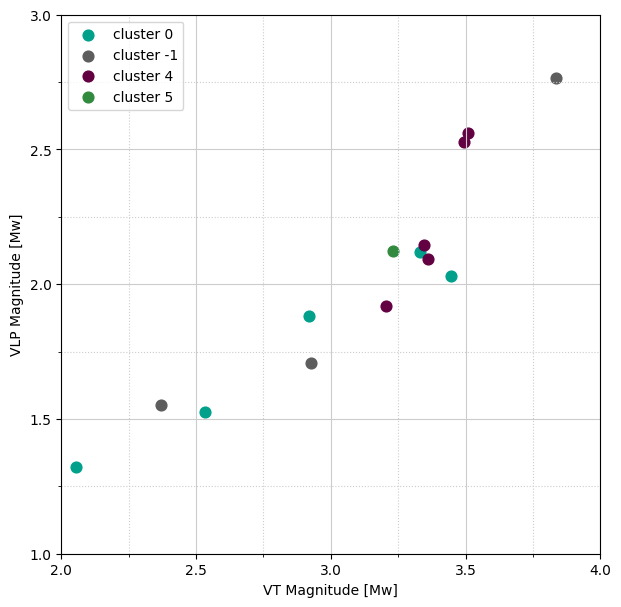

In [90]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, axs = plt.subplots(1, 1,figsize=(7,7))

lim_xmin=2.
lim_xmax=4.
lim_ymin=1.
lim_ymax=3.
i=0

# VLP data
key='VLP'
magnitude_vlp = [ev.magnitude for ev in cls_VLP[key]]

 

axs.set_xlabel('VT Magnitude [Mw]')
axs.set_ylabel('VLP Magnitude [Mw]')
axs.axis('scaled')
axs.set(xlim=(lim_xmin,lim_xmax), ylim=(lim_ymin,lim_ymax))

axs.xaxis.set_major_locator(MultipleLocator(0.5))
axs.yaxis.set_major_locator(MultipleLocator(0.5))

# Change minor ticks to show every
axs.xaxis.set_minor_locator(AutoMinorLocator(2))
axs.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
axs.grid(which='major', color='#CCCCCC', linestyle='-')
axs.grid(which='minor', color='#CCCCCC', linestyle=':')

clustername=[]
for n,ev_vt in enumerate(VT):
    if ev_vt[3] not in clustername: # only one label per cluster
        axs.scatter(ev_vt[1],magnitude_vlp[n],color=ev_vt[2],label=f'cluster {ev_vt[3]}',s=60)
        clustername.append(ev_vt[3])
    else:
        axs.scatter(ev_vt[1],magnitude_vlp[n],color=ev_vt[2],s=60)

axs.legend(loc=2)

fig.savefig('../PLOTS/TIMELINE_CLUSTERS/timeline_mag.pdf')